<h2 style="color:blue" align="center">Handwritten digits classification using CNN</h2>

In this notebook we will classify handwritten digits using a simple neural network (ANN) first and than repeat same thing with convolutional neural network. We will see how accuracy improves clickly when you use convolutional neural network.

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Loading data from karas.dataset

In [6]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 11s 1us/step


Checking Data shapes

In [43]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [7]:
X_train.shape

(60000, 28, 28)

In [8]:
X_test.shape

(10000, 28, 28)

In [19]:
X_train[4].shape

(28, 28)

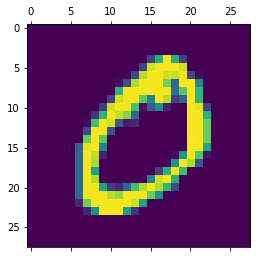

In [20]:
plt.matshow(X_train[1])

In [38]:
y_test[1]

2

In [12]:
y_train[0]

5

In [13]:
X_train = X_train / 255
X_test = X_test / 255

<h3 style='color:purple'>Using ANN for classification</h3>

In [27]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 100)               78500     
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train, y_train, epochs=10)


ValueError: not enough values to unpack (expected 2, got 0)

In [39]:
p=model.predict(X_test[[1]])

In [40]:
np.argmax(p)

2

In [15]:
model.evaluate(X_test,y_test)


313/313 [==============================] - 2s 5ms/step - loss: 0.0764 - accuracy: 0.9776


[0.07637667655944824, 0.9775999784469604]

In [35]:
X_train = X_train.reshape(-1,28,28,1)
X_train.shape


(60000, 28, 28, 1)

In [16]:
X_test = X_test.reshape(-1,28,28,1)
X_test.shape


(10000, 28, 28, 1)

<h3 style='color:purple'>Using CNN for classification</h3>

In [21]:
model = keras.Sequential([
    
    layers.Conv2D(30, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    #you may del/ add more layer
    layers.Conv2D(60, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
 
    
    layers.Flatten(),
    layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])
model.summary()

AttributeError: 'Sequential' object has no attribute 'summery'

In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=2)

Epoch 1/2
1875/1875 [==============================] - 157s 83ms/step - loss: 0.1329 - accuracy: 0.9588
Epoch 2/2
1875/1875 [==============================] - 142s 76ms/step - loss: 0.0444 - accuracy: 0.9863


In [ ]:
p=model.predict(X_test[[1]])
np.argmax(p)

In [61]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [42]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 4s 6ms/step - loss: 2.4086 - accuracy: 0.1026


[2.408557891845703, 0.10260000079870224]